In [1]:
!pip install pyxlsb

In [2]:
import pandas as pd

In [16]:
file_path = r'C:\Users\rahaf\Downloads\stc TV Data Set_T1 (1).xlsb'
df = pd.read_excel(file_path, engine='pyxlsb')

In [14]:
df.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [17]:
df.shape

(1048575, 13)

In [18]:
df.isnull().sum()

Column1                 0
date_                   0
user_id_maped           0
program_name            0
duration_seconds        0
program_class           0
season                  0
episode                 0
program_desc        14038
program_genre           0
series_title            0
hd                      0
original_name           0
dtype: int64

In [22]:
# وصف إحصائي للبيانات الرقمية
desc = df.describe()

In [23]:
# استخراج المتوسط، الانحراف المعياري، القيم العظمى والصغرى
mean_values = df.mean(numeric_only=True)
std_values = df.std(numeric_only=True)
min_values = df.min(numeric_only=True)
max_values = df.max(numeric_only=True)user_id_maped 

In [24]:
desc, mean_values, std_values, min_values, max_values

(            Column1         date_  user_id_maped  duration_seconds  \
 count  1.048575e+06  1.048575e+06   1.048575e+06      1.048575e+06   
 mean   6.281730e+05  4.301202e+04   1.709266e+04      1.230957e+03   
 std    3.597041e+05  1.242834e+02   1.003513e+04      6.821058e+03   
 min    1.000000e+00  4.280800e+04   1.000000e+00      2.000000e+00   
 25%    3.180660e+05  4.289600e+04   8.253000e+03      5.200000e+01   
 50%    6.303550e+05  4.302200e+04   1.714900e+04      1.190000e+02   
 75%    9.398225e+05  4.312100e+04   2.566500e+04      1.328000e+03   
 max    1.247852e+06  4.322000e+04   3.428000e+04      1.461329e+06   
 
              season       episode  series_title            hd  
 count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  
 mean   1.342139e+00  6.157952e+00  1.205922e-02  3.862728e-01  
 std    2.104095e+00  1.222015e+01  1.091504e-01  4.868946e-01  
 min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
 25%    0.000000e+00  0.000000e+00

In [27]:
# توزيع عدد المشاهدات حسب صنف البرنامج
df['program_class'].value_counts()

SERIES/EPISODES    560174
MOVIE              488401
Name: program_class, dtype: int64

In [31]:
# حساب عدد المستخدمين اللي شافوا HD مقابل SD
hd_sd_distribution = df['hd'].value_counts().rename({0: 'SD', 1: 'HD'})

hd_sd_distribution

SD    643539
HD    405036
Name: hd, dtype: int64

In [33]:
# حساب النسبة المئوية
hd_sd_percentage = df['hd'].value_counts(normalize=True) * 100
hd_sd_percentage = hd_sd_percentage.rename({0: 'SD', 1: 'HD'})

hd_sd_percentage

SD    61.37272
HD    38.62728
Name: hd, dtype: float64

In [34]:
# متوسط المشاهدة بجودة HD لكل مستخدم
user_hd_ratio = df.groupby('user_id_maped')['hd'].mean()

# هذا يعطينا نسبة مشاهدات HD لكل مستخدم (من 0 إلى 1)
user_hd_ratio.head()

user_id_maped
1     0.571429
5     0.019355
9     1.000000
11    0.251908
15    0.416880
Name: hd, dtype: float64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# إعداد شكل عام للرسومات
sns.set(style="whitegrid")

C:\Users\rahaf\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


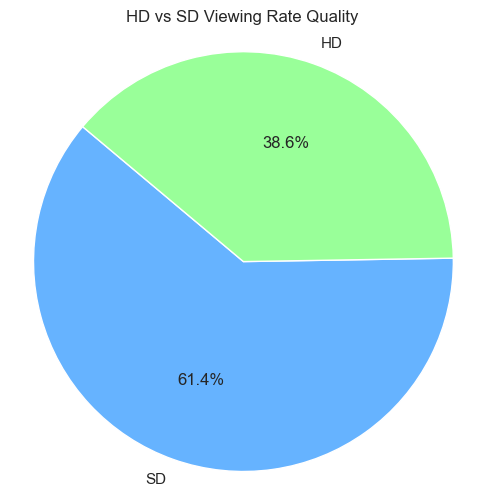

In [38]:
labels = ['SD', 'HD']
sizes = df['hd'].value_counts().sort_index()  # 0 = SD, 1 = HD
colors = ['#66b3ff', '#99ff99']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('HD vs SD Viewing Rate Quality')
plt.axis('equal')
plt.show()

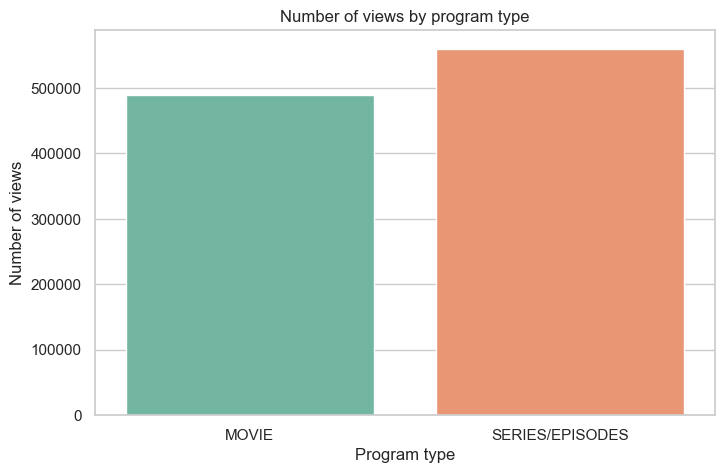

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='program_class', palette='Set2')
plt.title('Number of views by program type')
plt.xlabel('Program type')
plt.ylabel('Number of views')
plt.show()

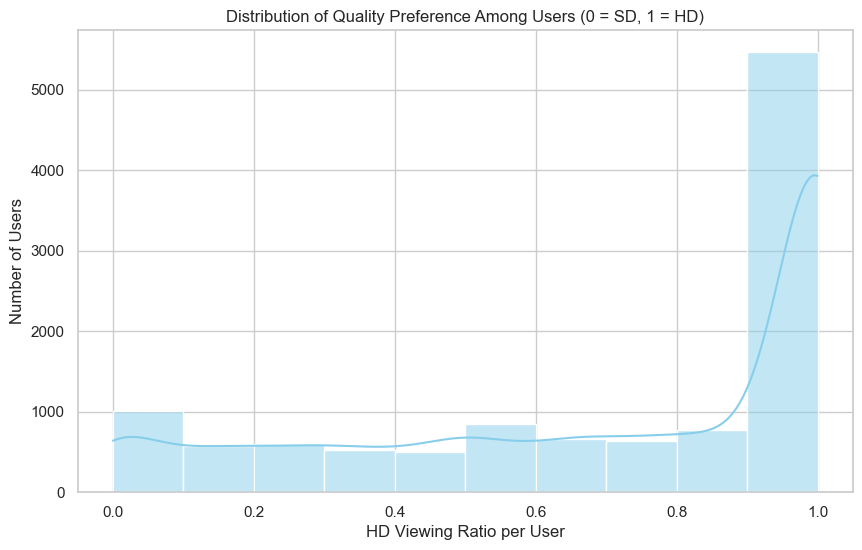

In [42]:
# First, calculate the HD ratio for each user
user_hd_ratio = df.groupby('user_id_maped')['hd'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(user_hd_ratio['hd'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Quality Preference Among Users (0 = SD, 1 = HD)')
plt.xlabel('HD Viewing Ratio per User')
plt.ylabel('Number of Users')
plt.show()

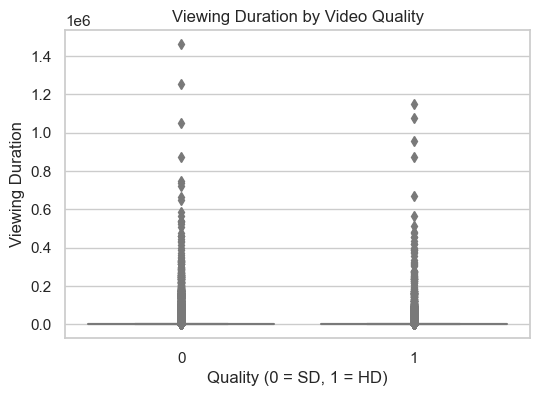

In [45]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='hd', y='duration_seconds', data=df, palette='coolwarm')
plt.title('Viewing Duration by Video Quality')
plt.xlabel('Quality (0 = SD, 1 = HD)')
plt.ylabel('Viewing Duration')
plt.show()